In [1]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate dataset
data = {
    "CustomerID": [f"CUST{i:04d}" for i in range(1, 301)],
    "Age": np.random.randint(18, 65, size=300),
    "Gender": np.random.choice(["Male", "Female"], size=300),
    "Annual_Income": np.random.randint(20000, 120000, size=300),
    "Spending_Score": np.random.randint(1, 101, size=300),
    "Product_Category": np.random.choice(["Electronics", "Clothing", "Groceries", "Books"], size=300),
    "Purchase_Amount": np.round(np.random.uniform(10, 500, size=300), 2),
    "Purchase_Date": pd.date_range(start="2024-01-01", periods=300, freq="D").strftime('%Y-%m-%d')
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce some missing values
df.loc[np.random.choice(df.index, 10, replace=False), 'Annual_Income'] = np.nan

# Save dataset
df.to_csv("ecommerce_dataset.csv", index=False)
print("Dataset saved as 'ecommerce_dataset.csv'")


Dataset saved as 'ecommerce_dataset.csv'


In [2]:
# Load the dataset
df = pd.read_csv("ecommerce_dataset.csv")




In [3]:
df.head(10)

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Product_Category,Purchase_Amount,Purchase_Date
0,CUST0001,56,Female,117856.0,57,Electronics,337.36,2024-01-01
1,CUST0002,46,Male,58304.0,17,Electronics,110.44,2024-01-02
2,CUST0003,32,Female,89449.0,47,Electronics,153.64,2024-01-03
3,CUST0004,60,Male,102986.0,23,Groceries,449.20,2024-01-04
4,CUST0005,25,Female,109643.0,79,Groceries,16.37,2024-01-05
5,CUST0006,38,Female,40764.0,85,Clothing,51.90,2024-01-06
6,CUST0007,56,Female,106027.0,14,Clothing,111.86,2024-01-07
7,CUST0008,36,Female,58494.0,66,Electronics,23.00,2024-01-08
8,CUST0009,40,Female,23373.0,75,Books,98.90,2024-01-09
9,CUST0010,28,Male,32161.0,51,Books,295.69,2024-01-10


In [5]:
# Handle missing values
df.dropna(inplace=True)

In [7]:
# Create a new feature: Income Category
df['Income_Category'] = pd.cut(
    df['Annual_Income'],
    bins=[0, 40000, 80000, 120000],
    labels=["Low", "Medium", "High"]
)


In [8]:
df.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Product_Category,Purchase_Amount,Purchase_Date,Income_Category
0,CUST0001,56,Female,117856.0,57,Electronics,337.36,2024-01-01,High
1,CUST0002,46,Male,58304.0,17,Electronics,110.44,2024-01-02,Medium
2,CUST0003,32,Female,89449.0,47,Electronics,153.64,2024-01-03,High
3,CUST0004,60,Male,102986.0,23,Groceries,449.20,2024-01-04,High
4,CUST0005,25,Female,109643.0,79,Groceries,16.37,2024-01-05,High


In [9]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Age  Annual_Income  Spending_Score  Purchase_Amount
count  300.000000     300.000000      300.000000       300.000000
mean    40.810000   67401.663333       49.113333       261.975833
std     13.547164   27602.977630       29.691961       144.851158
min     18.000000   20384.000000        1.000000        13.130000
25%     29.000000   43959.750000       23.000000       135.355000
50%     41.500000   64646.500000       50.000000       275.310000
75%     52.000000   89560.750000       75.000000       392.030000
max     64.000000  119835.000000      100.000000       498.990000


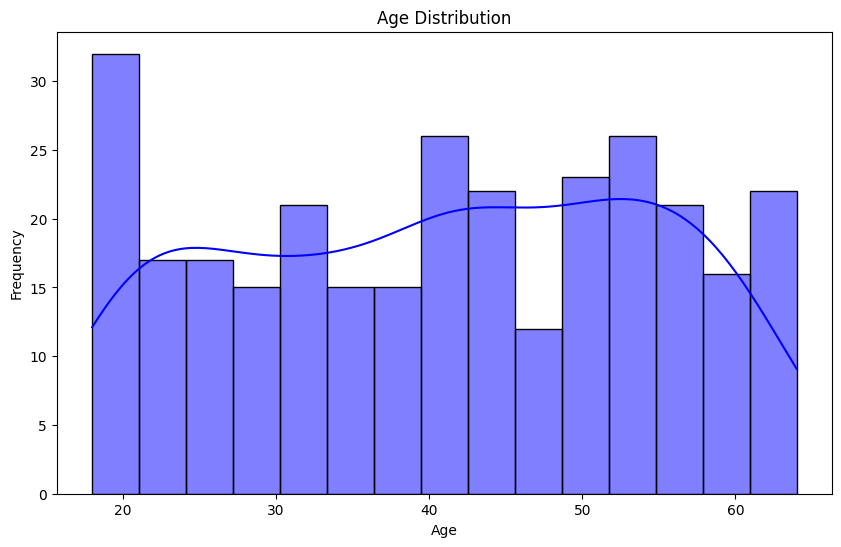

In [11]:
# Distribution plots
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



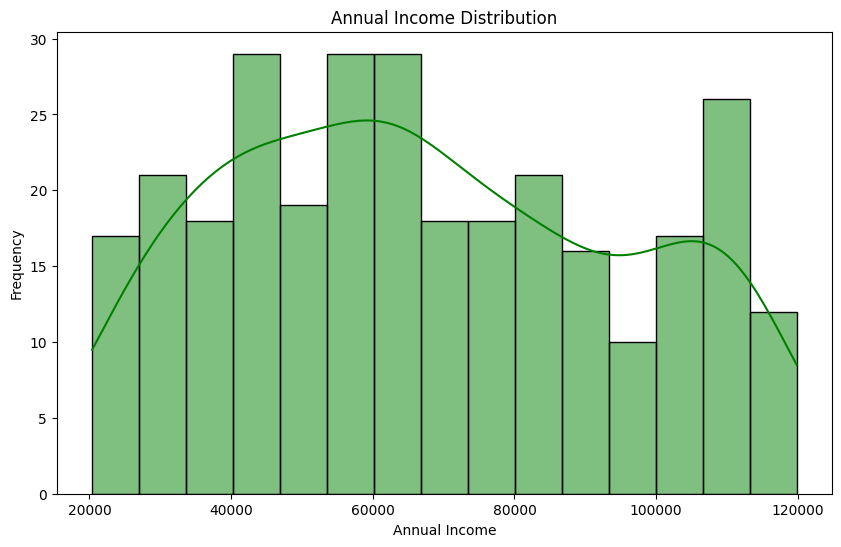

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], kde=True, bins=15, color='green')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

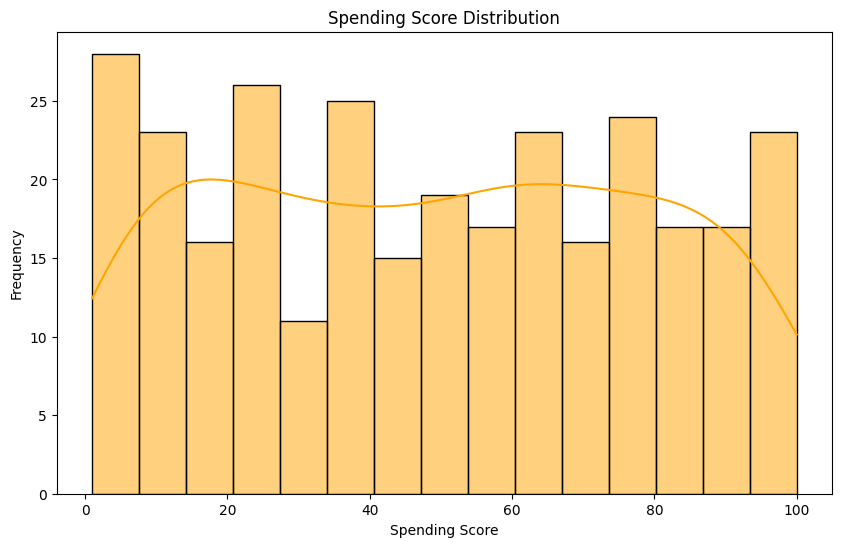

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending_Score'], kde=True, bins=15, color='orange')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.show()